The aim of this project is to get insight on whether there is a gender pay gap for developers in Germany. To do so, stackoverflow's 2022 Annual Developer Survey data is used to get insight on male and female developers in Germany, their educational and experience background, their age and the organizational size of the company they work for. All these factors might influence their salary. After getting a good understanding of whether male and female developers who answered the survey are both equally qualified, two forecasting models are built in order to predict the salary a developer can achieve - one with including gender information and one without. With comparing the performance of both models, information on whether there exists a gender pay gap for developers in Germany can be achieved.

To achieve the end results for this project, we will be employing the CRISP-DM Process (Cross Industry Process for Data Mining). It includes the following steps:

1. business understanding
2. data understanding
3. prepare data
4. data modelling
5. evaluate the results
6. deploy

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the Data

In this analysis to better compare salaries, we'll focus on one country only, which will be German participants.

In [2]:
df = pd.read_csv('./Data/data_germany.csv')
df.head(5)

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,5,6,"I am not primarily a developer, but I write co...","Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
1,25,26,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Codecademy;edX;Udacity,...,30-60 minutes a day,60-120 minutes a day,Somewhat short,DevOps function;Microservices;Continuous integ...,Yes,No,Yes,Appropriate in length,Neither easy nor difficult,90647.0
2,48,49,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,...,15-30 minutes a day,Less than 15 minutes a day,Just right,Continuous integration (CI) and (more often) c...,Yes,No,Yes,Appropriate in length,Easy,106644.0
3,49,50,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,NaN,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,Continuous integration (CI) and (more often) c...,No,No,Yes,Appropriate in length,Easy,51192.0
4,59,60,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Codecademy,...,Over 120 minutes a day,30-60 minutes a day,Somewhat long,None of these,No,No,No,Too short,Easy,63986.0


Let's also have a look at the Stackoverflow developer's survey's question (2022 survey):

In [3]:
df_q=pd.read_csv('./Data/survey_results_schema.csv')
df_q.head(79)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
...,...,...,...,...,...,...
74,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR
75,QID290,Frequency_3,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR
76,QID294,TrueFalse_1,Are you involved in supporting new hires durin...,NaN,MC,MAVR
77,QID294,TrueFalse_2,Do you use learning resources provided by your...,NaN,MC,MAVR


## Gender

In this project, we would like to compare the Salary of Men and Women based on different criteria.
Since the survey offers a variety of answers to the question of the Gender (includig non-binary gender specification), we will focus on only the results of participants who either identified themselves as Men or Women.

In [4]:
df['Gender'].value_counts()

Man                                                                               4925
Woman                                                                              187
Prefer not to say                                                                   98
Non-binary, genderqueer, or gender non-conforming                                   64
Or, in your own words:                                                              25
Man;Non-binary, genderqueer, or gender non-conforming                               20
Woman;Non-binary, genderqueer, or gender non-conforming                             13
Man;Or, in your own words:                                                          12
Man;Woman                                                                            2
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming             2
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming       1
Man;Woman;Non-binary, genderqueer, or gende

In [5]:
# only use answers with a clear gender identification
df=df[(df['Gender']=='Man') | (df['Gender']=='Woman')].copy()

In [6]:
df['Gender'].value_counts()

Man      4925
Woman     187
Name: Gender, dtype: int64

## Main Branch

We want to compare the Salary of participants working as developers. The survey is open to developers, as well as hobby coders and former developers. We will only use data of participants working as developers or those not working primarily as developers, but who write code as part of their job.

In [7]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   3875
I am not primarily a developer, but I write code sometimes as part of my work     537
I code primarily as a hobby                                                       371
I am learning to code                                                             241
I used to be a developer by profession, but no longer am                           88
Name: MainBranch, dtype: int64

In [8]:
# only use answers of developers or of people who write code as part of their job
df=df[(df['MainBranch']=='I am a developer by profession') | (df['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work')].copy()

## Comparison between Men and Women

Let's have a look at the distribution between Men and Women among developers.

### Gender distribution

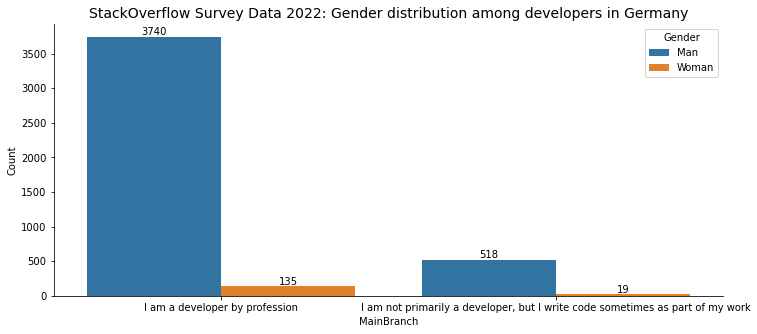

In [9]:
# create gender distribution plot
plt.figure(figsize=(12, 5))
ax1 = sns.countplot(x="MainBranch", hue="Gender", data=df)
ax1.set(xlabel='MainBranch', ylabel='Count')
for i in ax1.containers:
    ax1.bar_label(i,)
# change title
plt.title('StackOverflow Survey Data 2022: Gender distribution among developers in Germany', size=14)
# save plot
plt.savefig('Gender Distribution.png')
sns.despine()
plt.show()

In [10]:
print(df.shape)
print(df[df['Gender']=='Man'].shape)
print(df[df['Gender']=='Woman'].shape)

(4412, 80)
(4258, 80)
(154, 80)


Among all 4412 German participants, 4258 were Men (96.5%) and 154 (3.5%) were Women. Respectively, female participants form 3.5% of professional developers and also 3.5% of participants who write code sometimes as part of their work.

Along with the salary, we'll also analyze a few factors that might influence the salary of professional developers.

### Educational degree

In [11]:
# create function to show percentage above bars
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

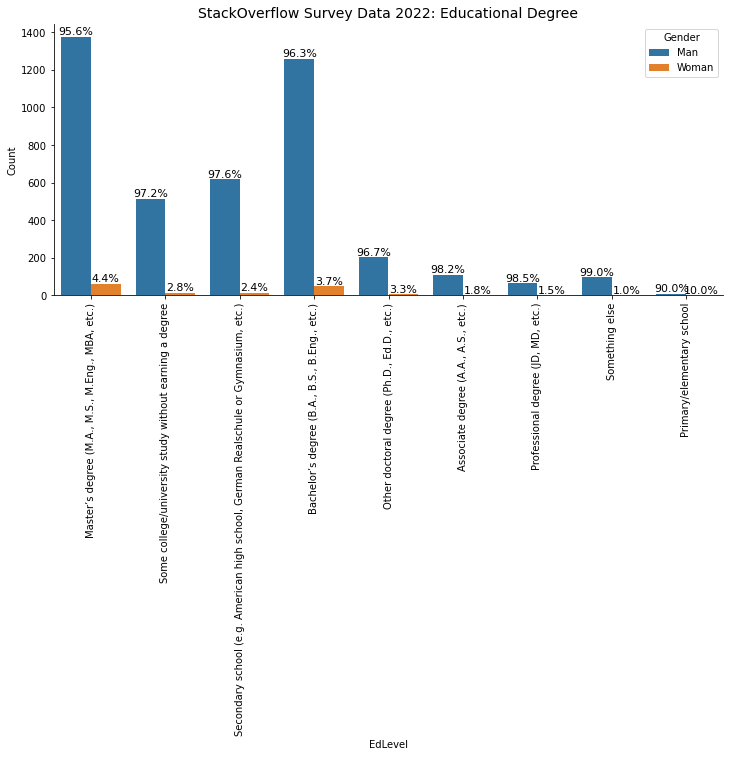

In [12]:
# create plot to show educational degree
plt.figure(figsize=(12, 5))
ax2 = sns.countplot(x="EdLevel", hue="Gender", data=df)
ax2.set(xlabel='EdLevel', ylabel='Count')
plt.xticks(rotation=90)
# show percentages
percentage_above_bar_relative_to_xgroup(ax2)
# change title
plt.title('StackOverflow Survey Data 2022: Educational Degree', size=14)
# save plot
plt.savefig('Educational Degree.png')
sns.despine()
plt.show()

While only 3.5% of all German participants were female, Women form 4.4% of all participants with a Master's Degree and 3.7% of those with a Bachelor's degree. Women therefore have a slightly higher Educational level than Men participating in this survey.

### Years of Experience

There are different questions which show the working and coding experience of participants. Let's compare them between Men and Women.

#### WorkExp

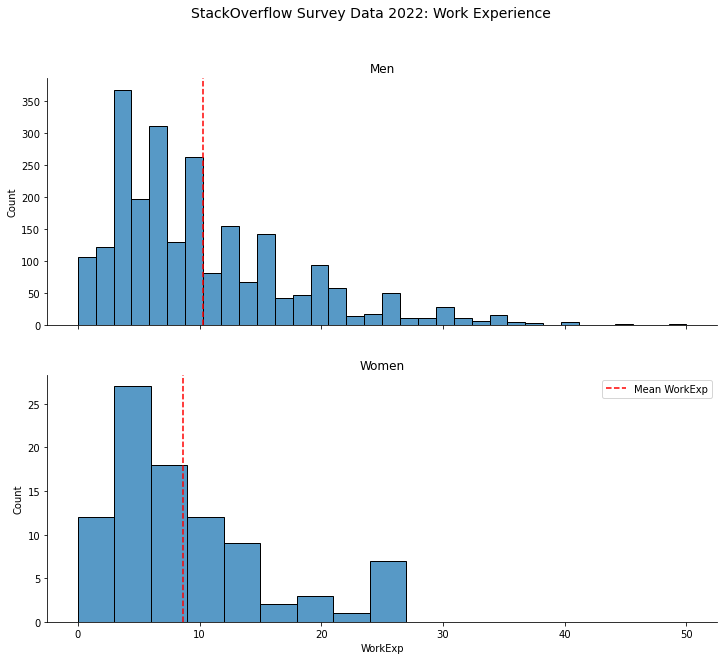

In [13]:
# create plot to show Working Experience
fig, axes=plt.subplots(2,1, figsize=(12,10), sharex=True)
# Men
sns.histplot(data=df[df['Gender']=='Man'], x='WorkExp', ax=axes[0])
axes[0].set_title('Men')
# Add vertical mean line
mean_men0=df[df['Gender']=='Man']['WorkExp'].mean()
axes[0].axvline(mean_men0, c='red', linestyle='dashed', label="Mean WorkExp")
# Women
sns.histplot(data=df[df['Gender']=='Woman'], x='WorkExp', ax=axes[1])
axes[1].set_title('Women')
# Add vertical mean line
mean_women0=df[df['Gender']=='Woman']['WorkExp'].mean()
axes[1].axvline(mean_women0, c='red', linestyle='dashed', label="Mean WorkExp")
sns.despine()
# change title
fig.suptitle('StackOverflow Survey Data 2022: Work Experience', size=14)
# save plot
plt.savefig('Work Experience.png')
plt.legend()
plt.show()

In [14]:
print(mean_men0)
print(mean_women0)

10.275630252100841
8.615384615384615


Male participants in the survey have a mean working experience of 10.3 years, while female participants only have a working experience of 8.6 years.

#### YearsCodePro

To compare the years of experience in coding professionally, we first have to convert the column "YearsCodePro" to numeric values. We'll convert "Less than 1 Year" to 0 years and "More than 50 years" to 51 years.

In [15]:
# change to numeric values only
df['YearsCodePro']=np.where(df['YearsCodePro']=='Less than 1 year',1,df['YearsCodePro'])
df['YearsCodePro']=np.where(df['YearsCodePro']=='More than 50 years',51,df['YearsCodePro'])

# convert column from object type to float
df['YearsCodePro']=df['YearsCodePro'].astype(float)

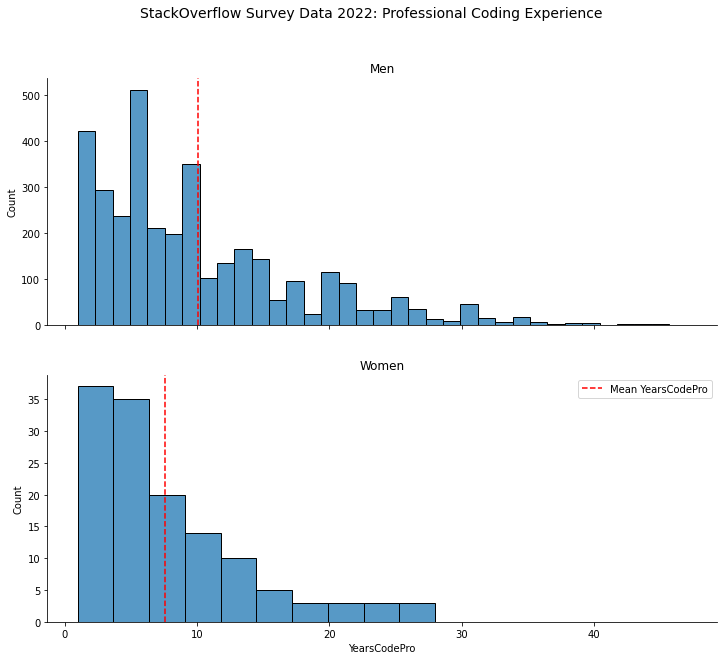

In [16]:
# create plot to show Professional Coding Experience
fig, axes=plt.subplots(2,1, figsize=(12,10), sharex=True)
# Men
sns.histplot(data=df[df['Gender']=='Man'], x='YearsCodePro', ax=axes[0])
axes[0].set_title('Men')
# Add vertical mean line
mean_men=df[df['Gender']=='Man']['YearsCodePro'].mean()
axes[0].axvline(mean_men, c='red', linestyle='dashed', label="Mean YearsCodePro")
# Women
sns.histplot(data=df[df['Gender']=='Woman'], x='YearsCodePro', ax=axes[1])
axes[1].set_title('Women')
# Add vertical mean line
mean_women=df[df['Gender']=='Woman']['YearsCodePro'].mean()
axes[1].axvline(mean_women, c='red', linestyle='dashed', label="Mean YearsCodePro")
sns.despine()
# change title
fig.suptitle('StackOverflow Survey Data 2022: Professional Coding Experience', size=14)
# save plot
plt.savefig('Professional Coding Experience.png')
plt.legend()
plt.show()

In [17]:
print(mean_men)
print(mean_women)

10.08275663206459
7.601503759398496


While male participants have an average professional coding experience of 10.1 years, female participants have a slightly less professional coding experience of 7.6 years on average.

#### YearsCode

Let's also compare the column "YearsCode", which includes coding experience as a hobby.

In [18]:
# change to numeric values only
df['YearsCode']=np.where(df['YearsCode']=='Less than 1 year',1,df['YearsCode'])
df['YearsCode']=np.where(df['YearsCode']=='More than 50 years',51,df['YearsCode'])

# convert column from object type to float
df['YearsCode']=df['YearsCode'].astype(float)

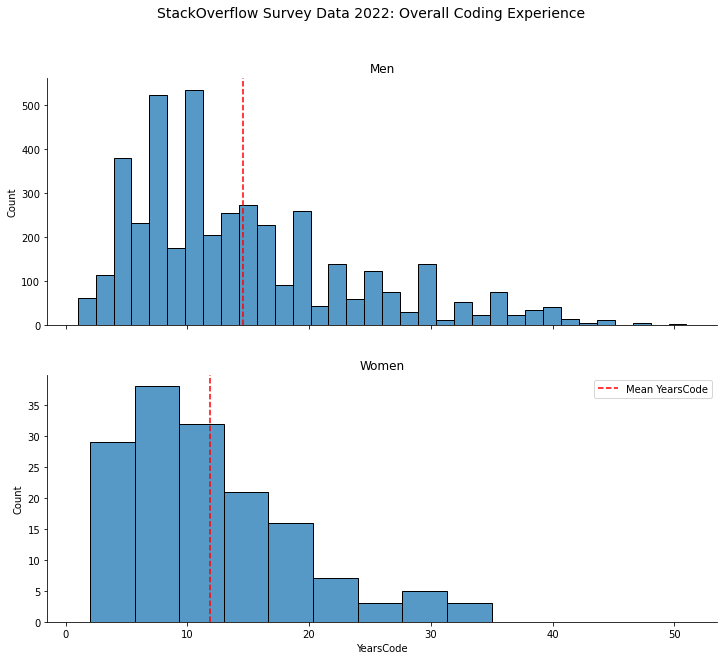

In [19]:
# create plot to show overall coding experience
fig, axes=plt.subplots(2,1, figsize=(12,10), sharex=True)
# Men
sns.histplot(data=df[df['Gender']=='Man'], x='YearsCode', ax=axes[0])
axes[0].set_title('Men')
# Add vertical mean line
mean_men2=df[df['Gender']=='Man']['YearsCode'].mean()
axes[0].axvline(mean_men2, c='red', linestyle='dashed', label="Mean YearsCode")
# Women
sns.histplot(data=df[df['Gender']=='Woman'], x='YearsCode', ax=axes[1])
axes[1].set_title('Women')
# Add vertical mean line
mean_women2=df[df['Gender']=='Woman']['YearsCode'].mean()
axes[1].axvline(mean_women2, c='red', linestyle='dashed', label="Mean YearsCode")
sns.despine()
# change title
fig.suptitle('StackOverflow Survey Data 2022: Overall Coding Experience', size=14)
# save plot
plt.savefig('Overall Coding Experience.png')
plt.legend()
plt.show()

In [20]:
print(mean_men2)
print(mean_women2)

14.597552365262414
11.85064935064935


Again, while male participants have an average overall coding experience of 14.6 years, female participants have a slightly less overall coding experience of 11.9 years on average.

### Age

An employee's age could also influence their salary. Let's compare ages between men and women

In [21]:
df['Age'].unique()

array(['25-34 years old', '55-64 years old', '18-24 years old',
       '35-44 years old', '45-54 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say', nan], dtype=object)

To be able to compare ages better, let's convert the answers to numeric ones. We'll always use the mean value of the categories, e.g. the answer '25-34 years old' will convert to 30.

In [22]:
# change to numeric values
df['Age']=np.where(df['Age']=='25-34 years old',30,df['Age'])
df['Age']=np.where(df['Age']=='55-64 years old',60,df['Age'])
df['Age']=np.where(df['Age']=='18-24 years old',20,df['Age'])
df['Age']=np.where(df['Age']=='35-44 years old',40,df['Age'])
df['Age']=np.where(df['Age']=='45-54 years old',50,df['Age'])
df['Age']=np.where(df['Age']=='Under 18 years old',17,df['Age'])
df['Age']=np.where(df['Age']=='65 years or older',66,df['Age'])
df['Age']=np.where(df['Age']=='Prefer not to say',np.nan,df['Age'])

# convert column from object type to float
df['Age']=df['Age'].astype(float)

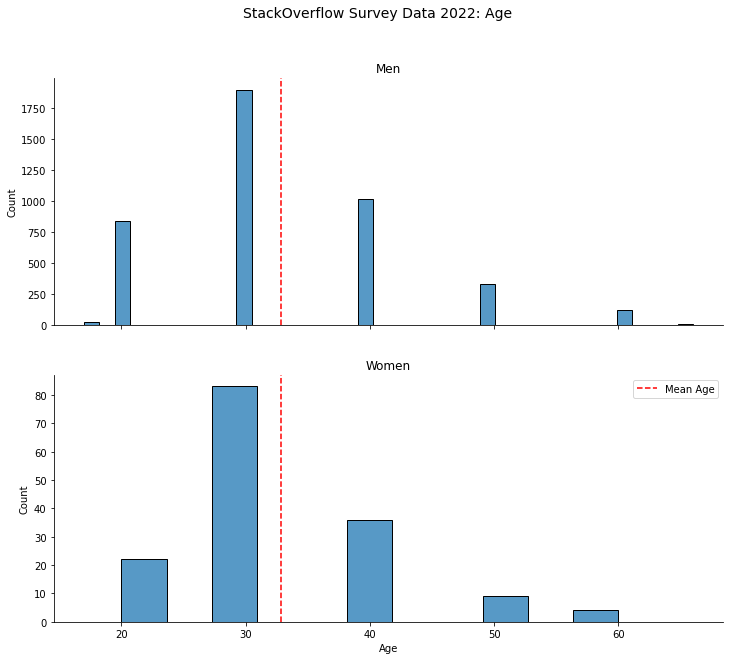

In [23]:
# create plot to show Age
fig, axes=plt.subplots(2,1, figsize=(12,10), sharex=True)
# Men
sns.histplot(data=df[df['Gender']=='Man'], x='Age', ax=axes[0])
axes[0].set_title('Men')
# Add vertical mean line
mean_men3=df[df['Gender']=='Man']['Age'].mean()
axes[0].axvline(mean_men3, c='red', linestyle='dashed', label="Mean Age")
# Women
sns.histplot(data=df[df['Gender']=='Woman'], x='Age', ax=axes[1])
axes[1].set_title('Women')
# Add vertical mean line
mean_women3=df[df['Gender']=='Woman']['Age'].mean()
axes[1].axvline(mean_women3, c='red', linestyle='dashed', label="Mean Age")
# change title
fig.suptitle('StackOverflow Survey Data 2022: Age', size=14)
# save plot
plt.savefig('Age.png')
sns.despine()
plt.legend()
plt.show()

In [24]:
print(mean_men3)
print(mean_women3)

32.83933192190073
32.857142857142854


Male and female participants have the same mean age of around 32.8.

### OrgSize

The company size might also influence the salary, let's explore it.

In [25]:
df['OrgSize'].unique()

array(['20 to 99 employees', '100 to 499 employees',
       '10,000 or more employees', nan, '500 to 999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '1,000 to 4,999 employees',
       '2 to 9 employees', 'I don’t know', '5,000 to 9,999 employees'],
      dtype=object)

Again, to be able to compare participants better, categories will be converted to numeric ones.

In [26]:
# change to numeric values
df['OrgSize']=np.where(df['OrgSize']=='20 to 99 employees',50,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='100 to 499 employees',300,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='500 to 999 employees',800,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='10,000 or more employees',10000,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='Just me - I am a freelancer, sole proprietor, etc.',1,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='10 to 19 employees',15,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='1,000 to 4,999 employees',3000,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='2 to 9 employees',5,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='5,000 to 9,999 employees',8000,df['OrgSize'])
df['OrgSize']=np.where(df['OrgSize']=='I don’t know',np.nan,df['OrgSize'])

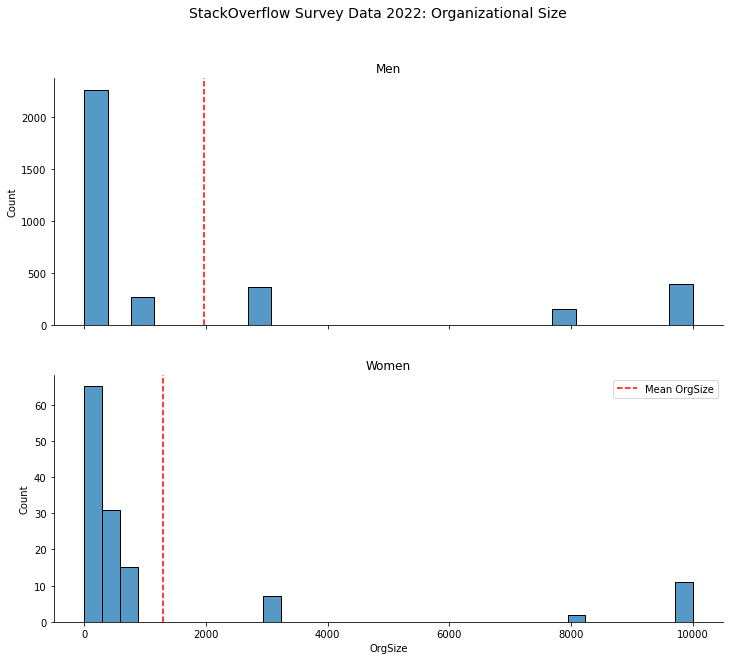

In [27]:
# create plot to show Organizational size
fig, axes=plt.subplots(2,1, figsize=(12,10), sharex=True)
# Men
sns.histplot(data=df[df['Gender']=='Man'], x='OrgSize', ax=axes[0])
axes[0].set_title('Men')
# Add vertical mean line
mean_men4=df[df['Gender']=='Man']['OrgSize'].mean()
axes[0].axvline(mean_men4, c='red', linestyle='dashed', label="Mean OrgSize")
# Women
sns.histplot(data=df[df['Gender']=='Woman'], x='OrgSize', ax=axes[1])
axes[1].set_title('Women')
# Add vertical mean line
mean_women4=df[df['Gender']=='Woman']['OrgSize'].mean()
axes[1].axvline(mean_women4, c='red', linestyle='dashed', label="Mean OrgSize")
sns.despine()
# change title
fig.suptitle('StackOverflow Survey Data 2022: Organizational Size', size=14)
# save plot
plt.savefig('Organizational Size.png')
plt.legend()
plt.show()

In [28]:
print(mean_men4)
print(mean_women4)

1963.9806022003474
1300.6946564885495


Female participants of the survey tend to work in smaller companies.

## Summary

Data exploration showed that there were far more male participants in the survey than female participants. However, this may represent the portion of Women working in software development.

Female developers in this survey tended to have a higher educational degree, which could increase their potential salary.

However, male participants had a longer experience in both working and coding. Furthermore, male participants tended to work in bigger companies, which could also increase their salary.

To check if there is a gender pay gap within developers taking part in this survey that is only influenced by the participant being a man or woman regardless of their degree or experience, we'll build a predictive model on the salary. We'll try to predict the salary including all information available and also without including gender information. In the end, we can compare which model creates more accurate predictions on the salary.

## Salary

As a target to predict, we'll use the column "ConvertedCompYearly". Since there are missing values within this column, for our prediction model we'll only use participants that gave salary information.

In [29]:
# only use results with a Salary
df=df[df['ConvertedCompYearly'].notna()].copy()

In [30]:
df['Currency'].unique()

array(['EUR European Euro', 'CHF\tSwiss franc',
       'USD\tUnited States dollar', 'AUD\tAustralian dollar'],
      dtype=object)

To be able to compare salaries, we'll only use those entries which reported their salary in European Euros.

In [31]:
# only use results with currency EUR
df=df[df['Currency']=='EUR European Euro'].copy()

Let's have a look at the median and mean salary for Men and Women

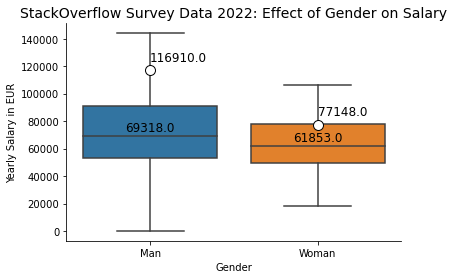

In [32]:
plt.figure()
box_plot=sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showmeans=True, showfliers=False, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'10'})
# calculate means and medians
medians=df.groupby(['Gender'])['ConvertedCompYearly'].median()
means=round(df.groupby(['Gender'])['ConvertedCompYearly'].mean())
# offset for display
median_offset = df['ConvertedCompYearly'].median() * 0.05
mean_offset = df['ConvertedCompYearly'].median() * 0.1
# display mean and median
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + median_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='black')
    box_plot.text(xtick,means[xtick] + mean_offset,means[xtick], 
            horizontalalignment='left',size='large',color='black')
# ylabel and title
plt.ylabel('Yearly Salary in EUR')
plt.title('StackOverflow Survey Data 2022: Effect of Gender on Salary', size=14)
sns.despine()
# save plot
plt.savefig('Effect of Gender on Salary.png', bbox_inches = 'tight')
plt.show()

The figure shows that male developers in Germany earn a higher salary than female developers.

To test whether both could still be samples of the same group, we'll perform a t-test. We'll state the null hypothesis:

$H_0$: Both populations' (Men and Women) means are identical. There is no gender pay gap.

In [33]:
from scipy.stats import ttest_ind
# create male and female dfs
df_male=df[df['Gender']=='Man']['ConvertedCompYearly']
df_female=df[df['Gender']=='Woman']['ConvertedCompYearly']
# perform t-test
tStat, pValue =ttest_ind(df_male, df_female, equal_var=False, alternative='two-sided')
# print results
print('Test statistic: ', tStat, ', p-Value: ', pValue)

Test statistic:  3.71724954046411 , p-Value:  0.000289579232023612


Since the p-Value is low (<0.05), we can reject the null hypothesis at a 95% level of confidence. There seems to indeed be a gender pay gap for female developers in Germany.